In [ ]:
import pandas as pd

import numpy as np

import pickle

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import sklearn

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RandomizedSearchCV

import imblearn

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

import pandas as pd
import numpy as np
data = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Dependents']=data['Dependents'].str.replace('+','')
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mode()[0])
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])





<ipython-input-5-03ff3cb41aa4>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Dependents']=data['Dependents'].str.replace('+','')


In [ ]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])

In [ ]:
data['Married']=data['Married'].fillna(data['Married'].mode()[0])

In [ ]:
data['Dependents']=data['Dependents'].str.replace('+','')

<ipython-input-9-d550c6f6dffc>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Dependents']=data['Dependents'].str.replace('+','')


In [ ]:
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])

In [ ]:
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])


In [ ]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mode()[0])

In [ ]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])

In [ ]:
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data['Gender'].unique()


array(['Male', 'Female'], dtype=object)

In [ ]:
data['Gender']=data['Gender'].replace({'Male':1,'Female':0})

In [ ]:
data['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
data['Married']=data['Married'].replace({'Yes':1,'No':0})


In [ ]:
data['Loan_Status']=data['Loan_Status'].replace({'N':0,'Y':1})


In [ ]:
data['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [ ]:
data['Dependents']=data['Dependents'].astype(int)


In [ ]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [ ]:
data['Education']=data['Education'].replace({'Graduate':1,'Not Graduate':2})

In [ ]:
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
data['Self_Employed']=data['Self_Employed'].replace({'Yes':1,'No':0})

In [ ]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
data['Property_Area']=le.fit_transform(data['Property_Area'])

In [ ]:
data['Property_Area']

0      2
1      0
2      2
3      2
4      2
      ..
609    0
610    0
611    2
612    2
613    1
Name: Property_Area, Length: 614, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 62.5+ KB


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<ipython-input-33-d8d465a4f262>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome'], color='r')
<ipython-input-33-d8d465a4f262>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Credit_History'])


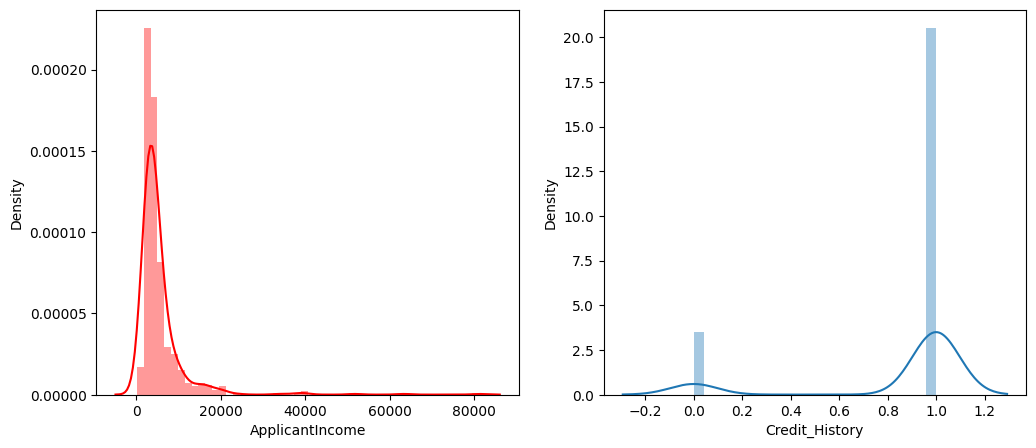

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(121)

sns.distplot(data['ApplicantIncome'], color='r')

plt.subplot(122)

sns.distplot(data['Credit_History'])

plt.show()

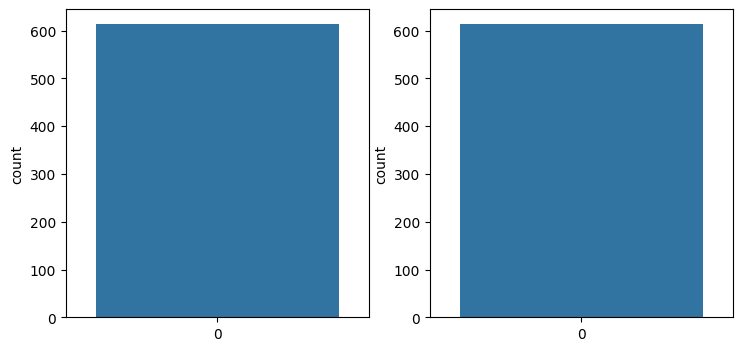

In [ ]:
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(data['Gender'])
plt.subplot(1,4,2)
sns.countplot(data['Education'])
plt.show()

<Axes: xlabel='Property_Area', ylabel='count'>

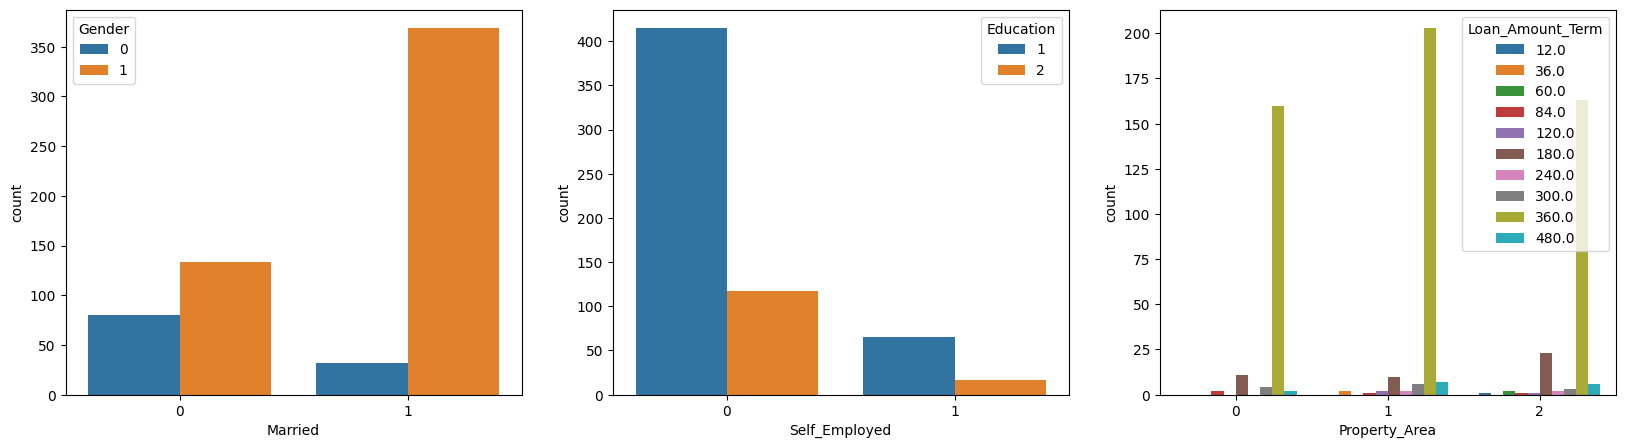

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(x=data['Married'], hue=data['Gender'])
plt.subplot(132)
sns.countplot(x=data['Self_Employed'], hue=data['Education'])
plt.subplot(133)
sns.countplot(x=data['Property_Area'], hue=data['Loan_Amount_Term'])

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,120.0,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,2,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 45.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Gender', ylabel='ApplicantIncome'>

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 61.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


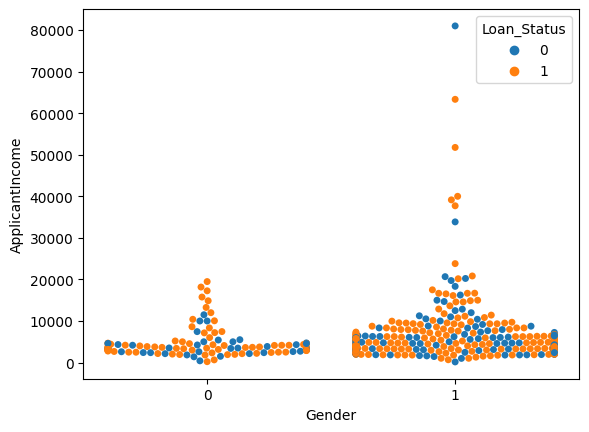

In [ ]:
import seaborn as sns

sns.swarmplot(x=data['Gender'],y=data['ApplicantIncome'],hue=data['Loan_Status'])

In [ ]:
x=data.drop(['Loan_Status','Loan_ID'],axis=1)

In [ ]:
y=data['Loan_Status']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
244,1,1,0,2,0,3406,4417.0,123.0,360.0,1.0,1
393,1,1,2,2,0,1993,1625.0,113.0,180.0,1.0,1
310,0,0,0,1,0,2917,0.0,84.0,360.0,1.0,1
408,1,1,1,1,0,8300,0.0,152.0,300.0,0.0,1
572,1,1,2,1,0,16666,0.0,275.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
71,1,1,2,2,1,1875,1875.0,97.0,360.0,1.0,1
106,1,1,2,1,0,11417,1126.0,225.0,360.0,1.0,2
270,0,0,0,1,0,3237,0.0,30.0,360.0,1.0,2
435,0,1,0,1,0,10047,0.0,120.0,240.0,1.0,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [ ]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=dtc.predict(x_test)
print('***DecisionTreeClassifier***')
print('confusion matrix')
print(confusion_matrix(y_test,y_pred))
print('classification report')
print(classification_report(y_test,y_pred))

***DecisionTreeClassifier***
confusion matrix
[[ 33  39]
 [ 27 104]]
classification report
              precision    recall  f1-score   support

           0       0.55      0.46      0.50        72
           1       0.73      0.79      0.76       131

    accuracy                           0.67       203
   macro avg       0.64      0.63      0.63       203
weighted avg       0.66      0.67      0.67       203



In [ ]:
import pickle
pickle.dump(dtc,open('rdf.pkl','wb'))

